##Imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io
import glob
from astropy.io import fits
from scipy import ndimage
from astropy import wcs as pywcs

%matplotlib inline

##Definitions

In [38]:
def convert_ra(s):
    c = [float(p) for p in s.split(':')]
    return (c[0]+c[1]/60.+c[2]/3600.)/24.*360.


def convert_dec(s):
    c = [float(p) for p in s.split(':')]
    return c[0]+c[1]/60.+c[2]/3600.

##Setup

In [52]:
folder = "/Users/spardy/Desktop/DiskMass/"  # Change this
files = glob.glob("{:s}*.fits".format(folder))
ra, dec = np.loadtxt("/Users/spardy/Desktop/DiskMass/DiskMassTable.ascii.txt",
                     skiprows=2, usecols=(1, 2), unpack=True,
                     converters={1:convert_ra, 2:convert_dec})
num_images = len(files)

Could not find center of image /Users/spardy/Desktop/DiskMass/frame-g-005636-3-0128.fits
438.284046916

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in log10


 1273.90737398
[38.284046916073635, 838.28404691607363, 873.90737397613339, 1673.9073739761334]


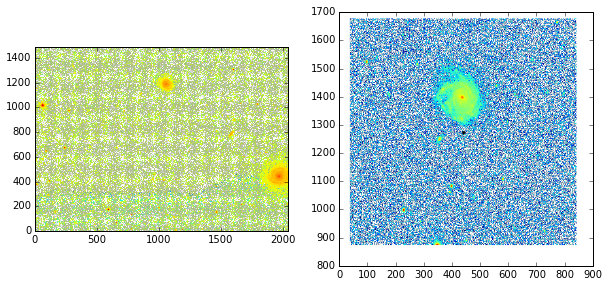

In [87]:
fig, axes = plt.subplots(num_images//2, 2, figsize=(10, 10*num_images//2+1,))
axes = axes.flatten()

for f, axis in zip(files, axes):
    imgfits = fits.open(f)
    imagearray = imgfits[0].data
    shape = imagearray.shape
    w = pywcs.WCS(imgfits[0].header)
    px, py = w.wcs_world2pix(ra, dec, 0)
    which_gal = (px > 0)*(px < shape[0])*(py > 0)*(py < shape[1])
    if any(which_gal):
        px = px[which_gal]
        py = py[which_gal]
        x_width = [np.min([400, shape[0]-px]),
                   np.min([400, px])]
        y_width = [np.min([400, shape[1]-py]),
                   np.min([400, py])]
        axis.imshow(np.log10(imagearray[py[0]-y_width[0]:py[0]+y_width[0],
                                        px[0]-x_width[0]:px[0]+x_width[0]]),
                    origin='lower',
                   extent = [px[0]-x_width[0], px[0]+x_width[0], py[0]-y_width[0], py[0]+y_width[0]])
        axis.plot(px[0], py[0], 'k.')
    else:
        print "Could not find center of image {:s}".format(f)
        axis.imshow(np.log10(imagearray), origin='lower')